In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import gmean

# ---------------------------
# 1. Load and Prepare Data
# ---------------------------
file_path = "D:/RobertSichomba/HomeWork2/data/hw2.csv"

# Load the CSV file with error handling
try:
    data = pd.read_csv(file_path, encoding="utf-8")
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding="ISO-8859-1")

# Check for missing values
data.dropna(inplace=True)  # Drop rows with missing values

# Define element columns (Ensure exact column names match the dataset)
all_elements = [
    'Al (ppb)', 'As (ppb)', 'Ba (ppb)', 'Ca (ppb)', 'Cl (ppb)', 'Cr (ppb)', 
    'Cu (ppb)', 'F (ppb)', 'Fe (ppb)', 'K (ppb)', 'Mg (ppb)', 'Mn (ppb)', 
    'Mo (ppb)', 'Ni (ppb)', 'NO3 (ppb)', 'Pb (ppb)', 'Se (ppb)', 'SO4 (ppb)', 
    'Sr (ppb)', 'U (ppb)', 'V (ppb)', 'Zn (ppb)'
]
subset_elements = ['Cr (ppb)', 'U (ppb)', 'SO4 (ppb)']

# Ensure only columns that exist in the dataset are selected
all_elements = [col for col in all_elements if col in data.columns]
subset_elements = [col for col in subset_elements if col in data.columns]

# Display dataset info
print("Dataset loaded successfully!")
print(f"Columns in dataset: {list(data.columns)}")
print(f"Using element columns: {all_elements}")
print(f"Subset elements: {subset_elements}")



Dataset loaded successfully!
Columns in dataset: ['Latitude', 'Longitude', 'SOURCE', 'SOURCE.NAM', 'OTHER.NAME', 'WELL.ID', 'Al (ppb)', 'As (ppb)', 'Ba (ppb)', 'Ca (ppb)', 'Cl (ppb)', 'Cr (ppb)', 'Cu (ppb)', 'F (ppb)', 'Fe (ppb)', 'K (ppb)', 'Mg (ppb)', 'Mn (ppb)', 'Mo (ppb)', 'Ni (ppb)', 'NO3 (ppb)', 'Pb (ppb)', 'Se (ppb)', 'SO4 (ppb)', 'Sr (ppb)', 'U (ppb)', 'V (ppb) ', 'Zn (ppb)', 'Cr_level']
Using element columns: ['Al (ppb)', 'As (ppb)', 'Ba (ppb)', 'Ca (ppb)', 'Cl (ppb)', 'Cr (ppb)', 'Cu (ppb)', 'F (ppb)', 'Fe (ppb)', 'K (ppb)', 'Mg (ppb)', 'Mn (ppb)', 'Mo (ppb)', 'Ni (ppb)', 'NO3 (ppb)', 'Pb (ppb)', 'Se (ppb)', 'SO4 (ppb)', 'Sr (ppb)', 'U (ppb)', 'Zn (ppb)']
Subset elements: ['Cr (ppb)', 'U (ppb)', 'SO4 (ppb)']


In [3]:
# ---------------------------
# 2. CLR Transformation
# ---------------------------
def clr_transform(df, cols):
    """Apply Centered Log-Ratio (CLR) transformation to compositional data."""
    df_transformed = df[cols] + 1e-9  # Add pseudocount to avoid log(0)
    gm = gmean(df_transformed, axis=1)
    clr_data = np.log(df_transformed.div(gm, axis=0))
    return clr_data

data_clr_all = clr_transform(data, all_elements)
data_clr_subset = clr_transform(data, subset_elements)

# ---------------------------
# 3. K-Means Clustering
# ---------------------------
def perform_kmeans(data, n_clusters=3):
    """Perform K-means clustering on standardized data."""
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    return kmeans.fit_predict(scaled_data)

# Cluster labels for all scenarios
labels_raw_all = perform_kmeans(data[all_elements])
labels_raw_subset = perform_kmeans(data[subset_elements])
labels_clr_all = perform_kmeans(data_clr_all)
labels_clr_subset = perform_kmeans(data_clr_subset)



d:\RobertSichomba\HomeWork2\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\RobertSichomba\HomeWork2\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


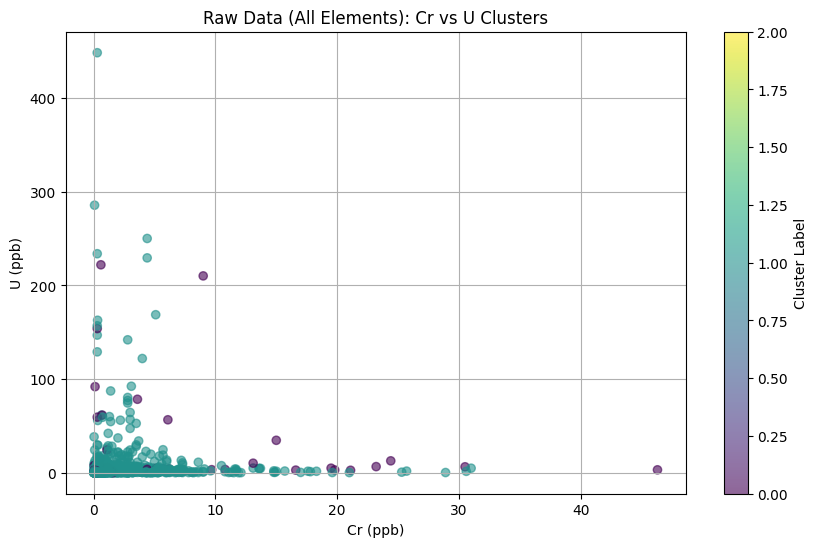

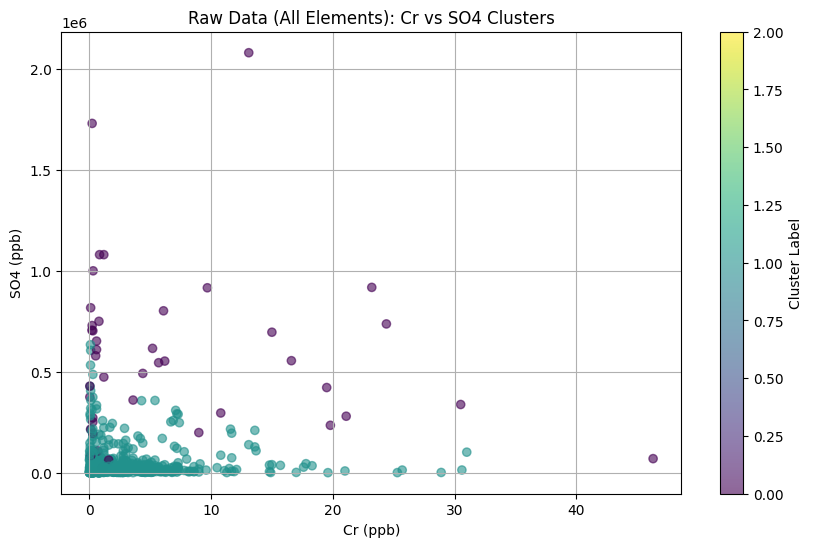

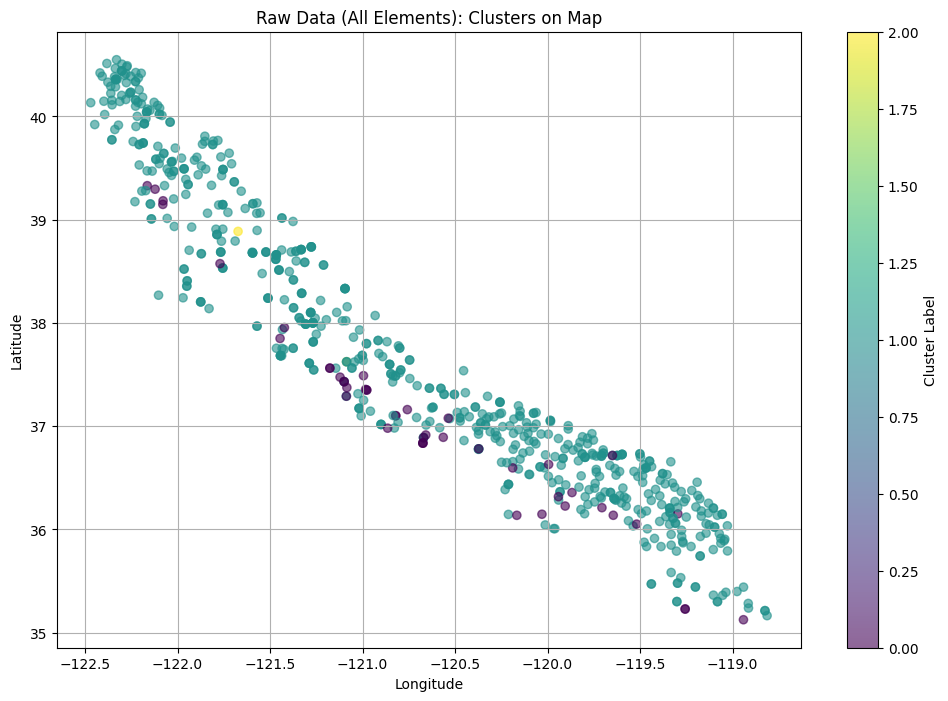

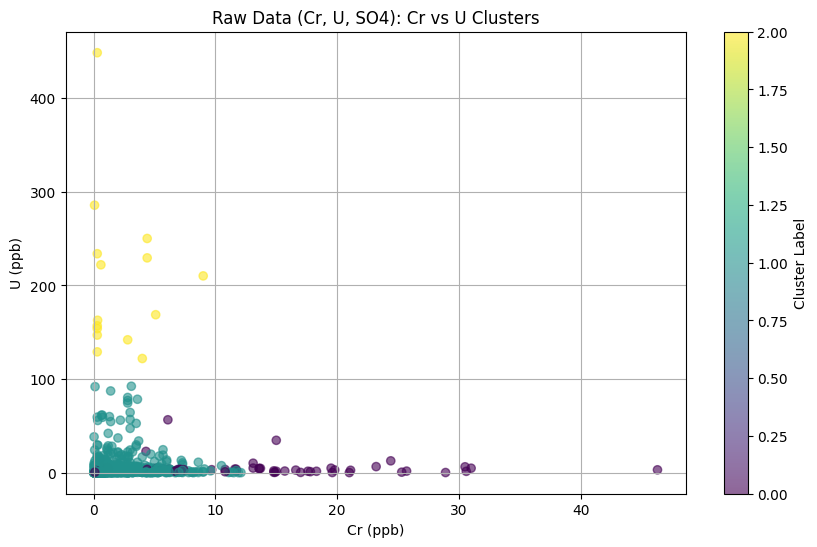

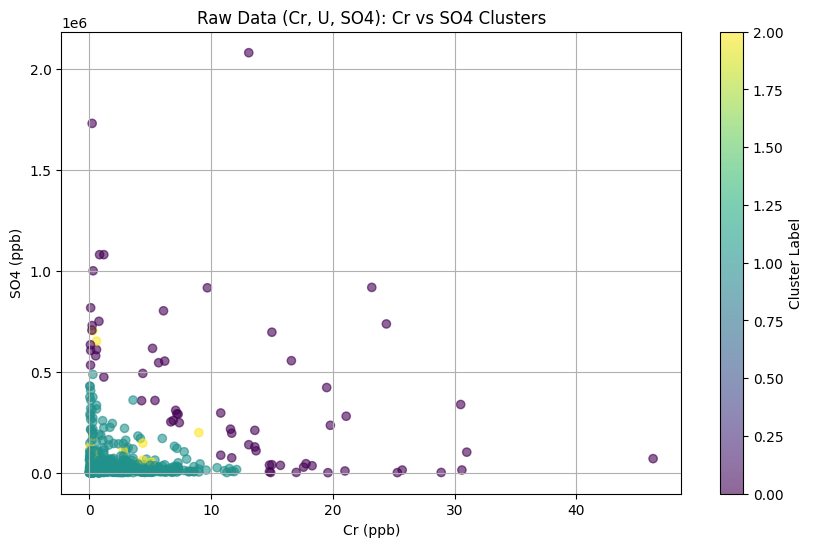

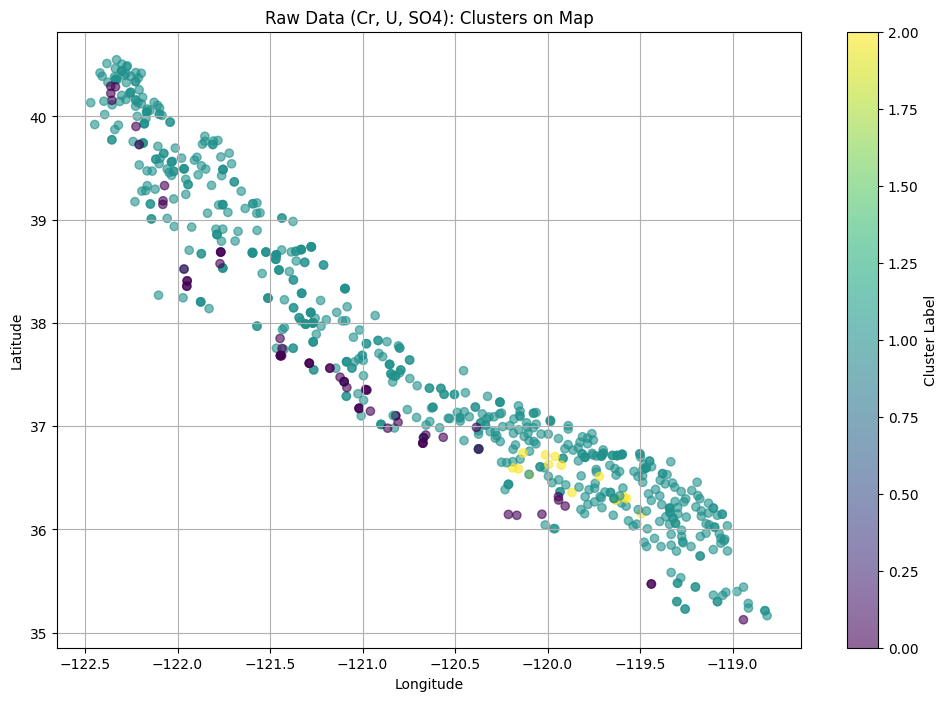

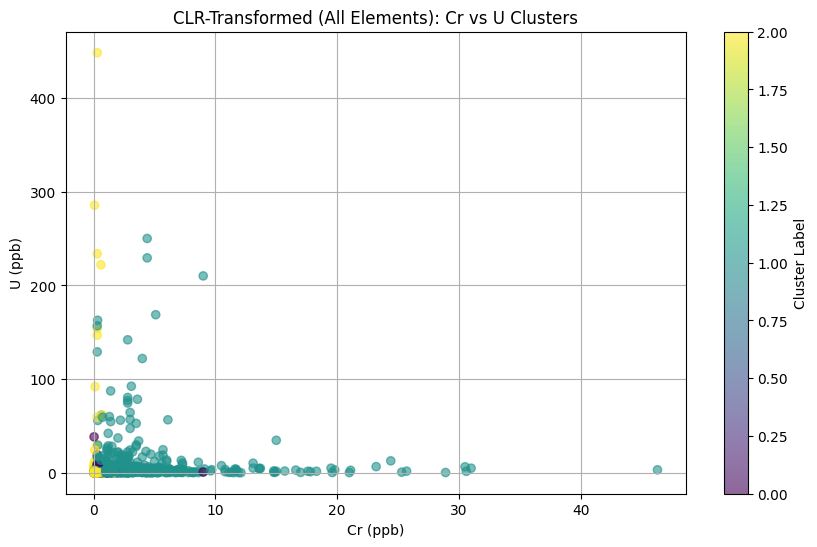

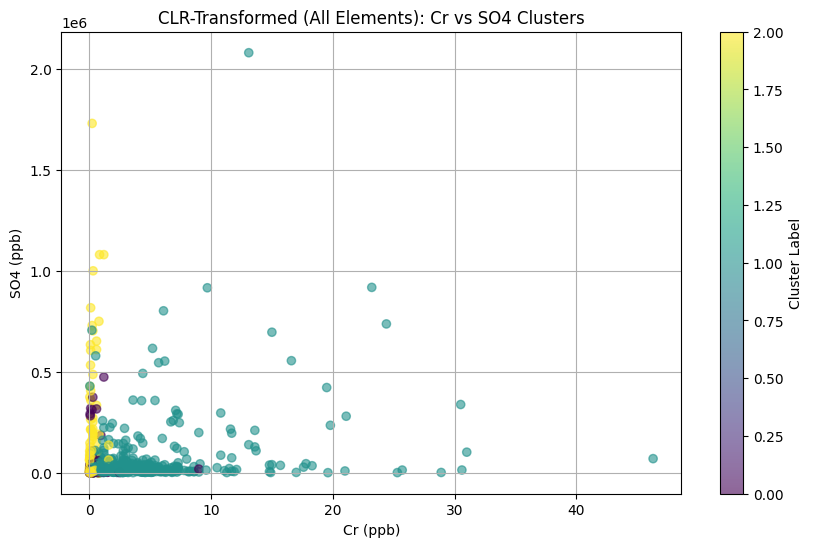

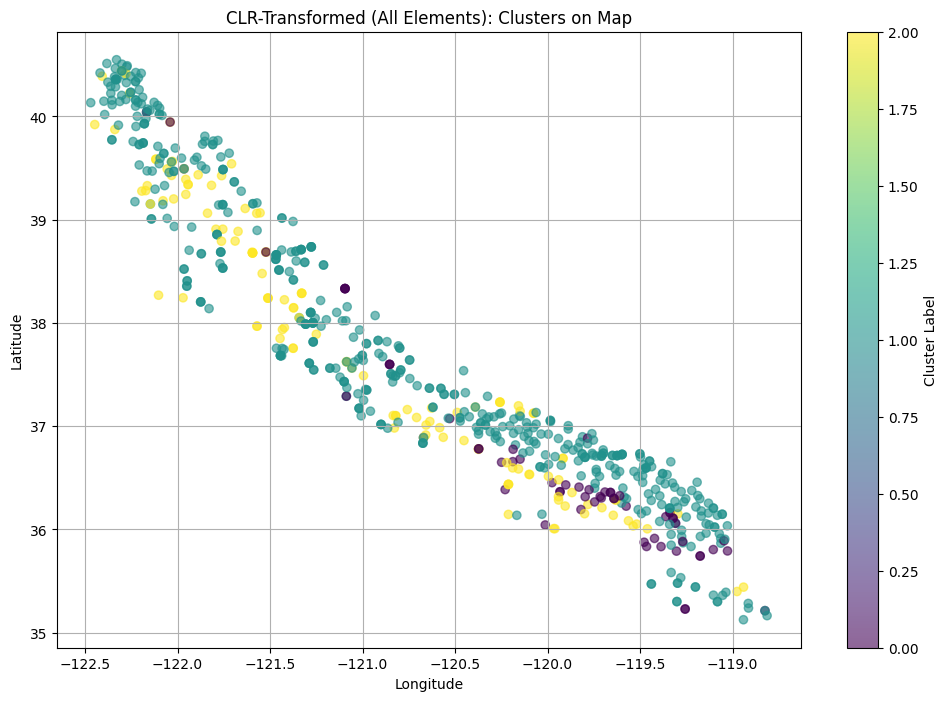

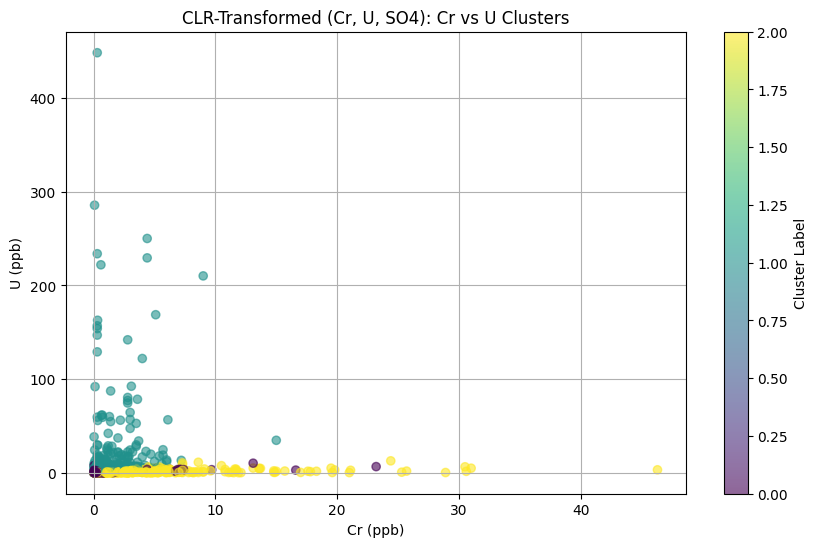

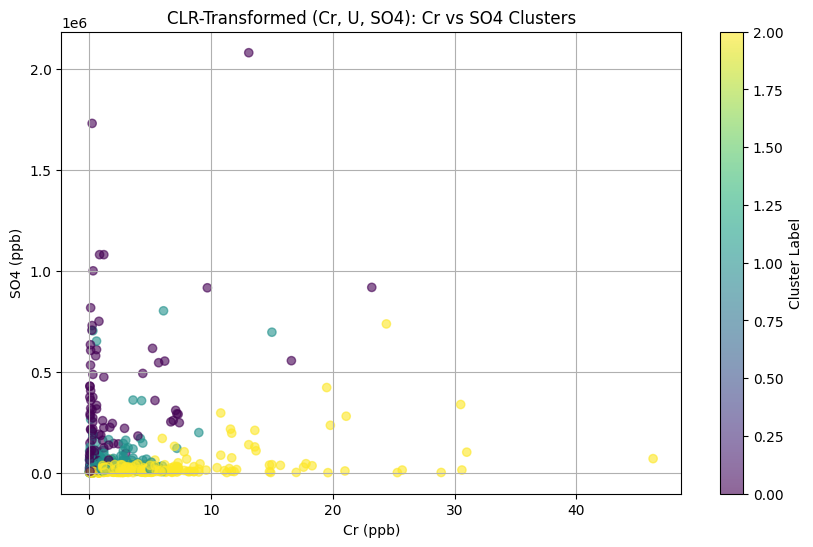

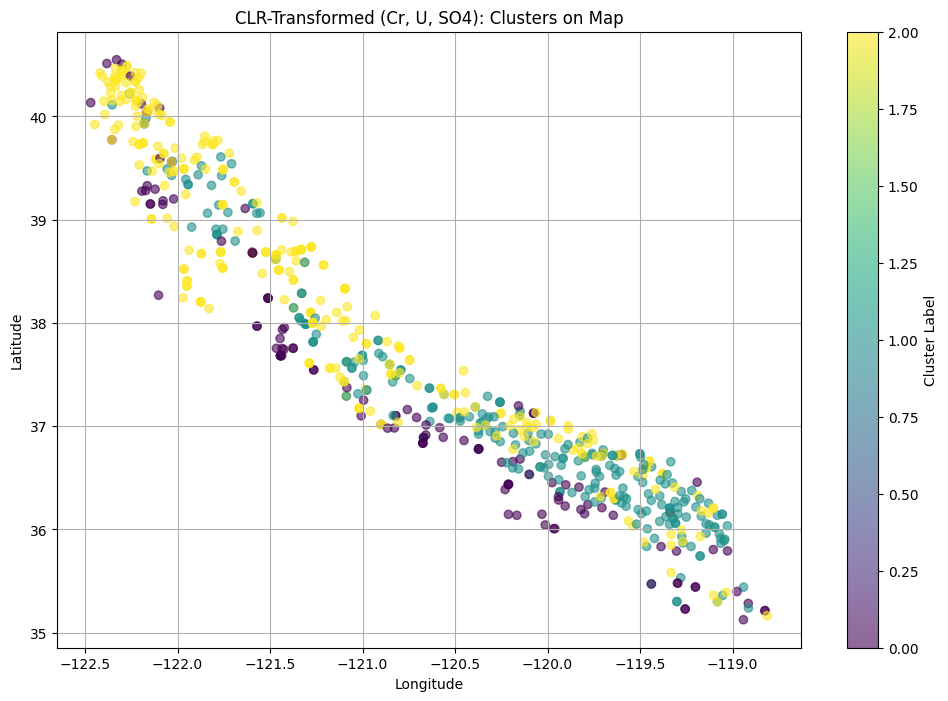

In [4]:
# ---------------------------
# 4. Visualization Functions
# ---------------------------
def plot_scatter(data, x_col, y_col, labels, title):
    """Plot scatter plot with cluster labels."""
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(data[x_col], data[y_col], c=labels, cmap='viridis', alpha=0.6)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title)
    plt.colorbar(scatter, label='Cluster Label')
    plt.grid(True)
    plt.show()

def plot_map(data, labels, title):
    """Plot clusters on a geographical map (longitude vs. latitude)."""
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(data['Longitude'], data['Latitude'], c=labels, cmap='viridis', alpha=0.6)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(title)
    plt.colorbar(scatter, label='Cluster Label')
    plt.grid(True)
    plt.show()

# ---------------------------
# 5. Generate Plots
# ---------------------------
# Scenario 1: Raw Data (All Elements)
plot_scatter(data, 'Cr (ppb)', 'U (ppb)', labels_raw_all, 
             'Raw Data (All Elements): Cr vs U Clusters')
plot_scatter(data, 'Cr (ppb)', 'SO4 (ppb)', labels_raw_all, 
             'Raw Data (All Elements): Cr vs SO4 Clusters')
plot_map(data, labels_raw_all, 'Raw Data (All Elements): Clusters on Map')

# Scenario 2: Raw Data (Subset: Cr, U, SO4)
plot_scatter(data, 'Cr (ppb)', 'U (ppb)', labels_raw_subset, 
             'Raw Data (Cr, U, SO4): Cr vs U Clusters')
plot_scatter(data, 'Cr (ppb)', 'SO4 (ppb)', labels_raw_subset, 
             'Raw Data (Cr, U, SO4): Cr vs SO4 Clusters')
plot_map(data, labels_raw_subset, 'Raw Data (Cr, U, SO4): Clusters on Map')

# Scenario 3: CLR-Transformed Data (All Elements)
plot_scatter(data, 'Cr (ppb)', 'U (ppb)', labels_clr_all, 
             'CLR-Transformed (All Elements): Cr vs U Clusters')
plot_scatter(data, 'Cr (ppb)', 'SO4 (ppb)', labels_clr_all, 
             'CLR-Transformed (All Elements): Cr vs SO4 Clusters')
plot_map(data, labels_clr_all, 'CLR-Transformed (All Elements): Clusters on Map')

# Scenario 4: CLR-Transformed Data (Subset: Cr, U, SO4)
plot_scatter(data, 'Cr (ppb)', 'U (ppb)', labels_clr_subset, 
             'CLR-Transformed (Cr, U, SO4): Cr vs U Clusters')
plot_scatter(data, 'Cr (ppb)', 'SO4 (ppb)', labels_clr_subset, 
             'CLR-Transformed (Cr, U, SO4): Cr vs SO4 Clusters')
plot_map(data, labels_clr_subset, 'CLR-Transformed (Cr, U, SO4): Clusters on Map')

In [5]:
# K-means clustering function (scales data first)
def perform_kmeans(data, n_clusters=3):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    return labels

In [6]:
# Cluster under all four scenarios
labels_raw_all = perform_kmeans(data[all_elements])
labels_raw_subset = perform_kmeans(data[subset_elements])
labels_clr_all = perform_kmeans(data_clr_all)
labels_clr_subset = perform_kmeans(data_clr_subset)

# Plotting functions
def plot_scatter(data, x_col, y_col, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[x_col], data[y_col], c=labels, cmap='viridis', alpha=0.6)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title)
    plt.colorbar(label='Cluster')
    plt.show()



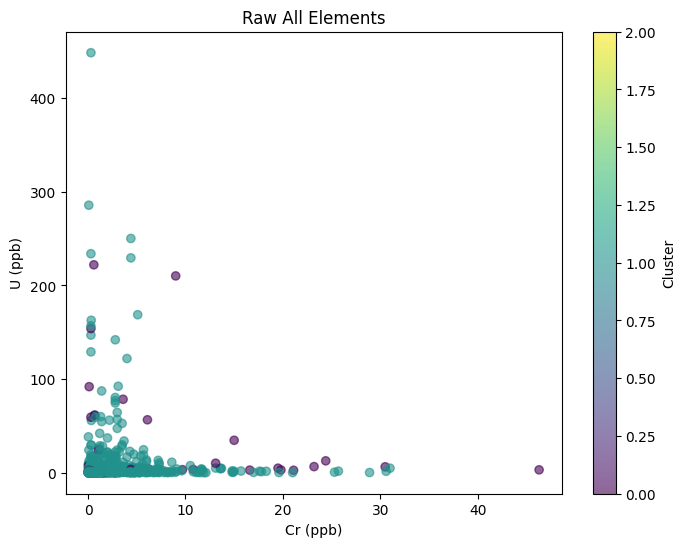

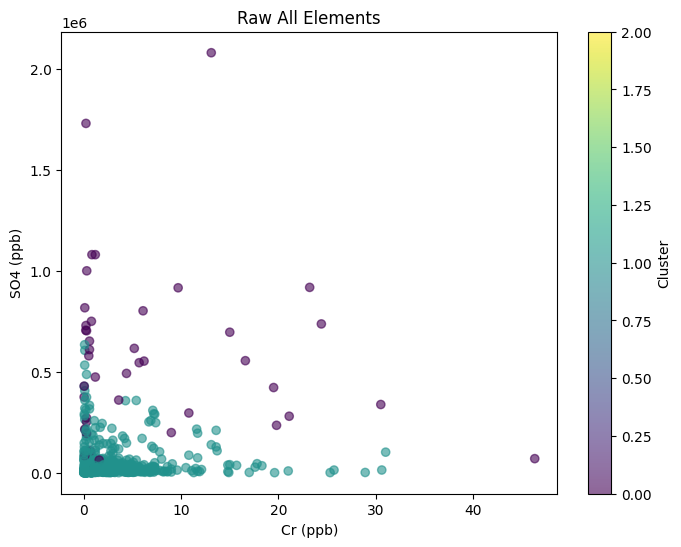

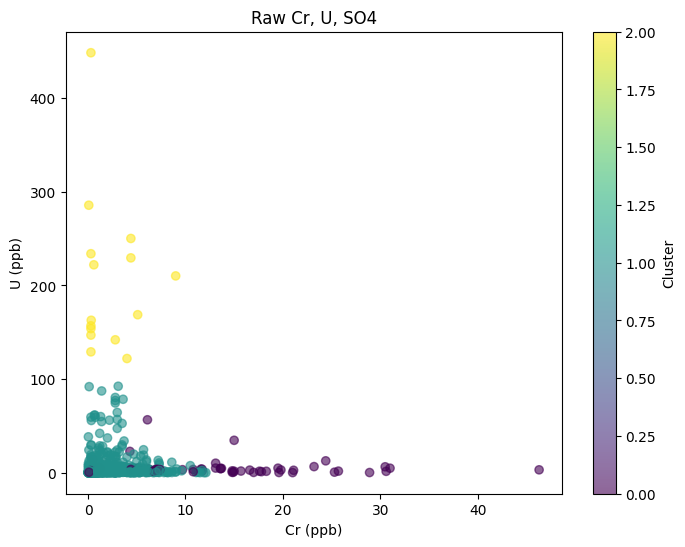

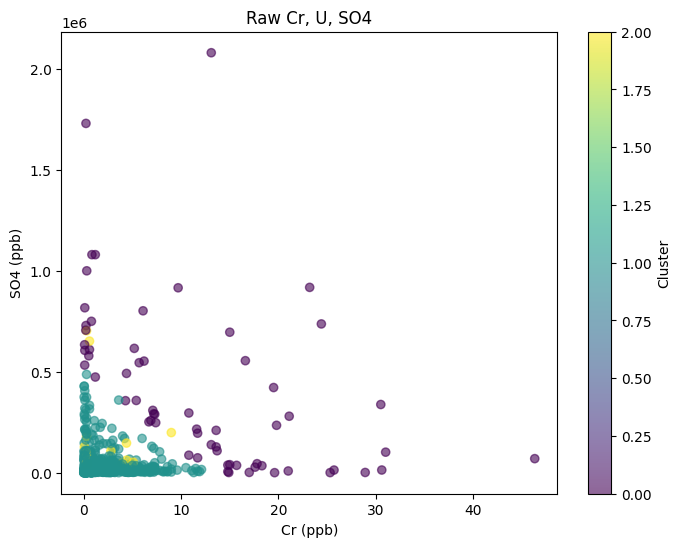

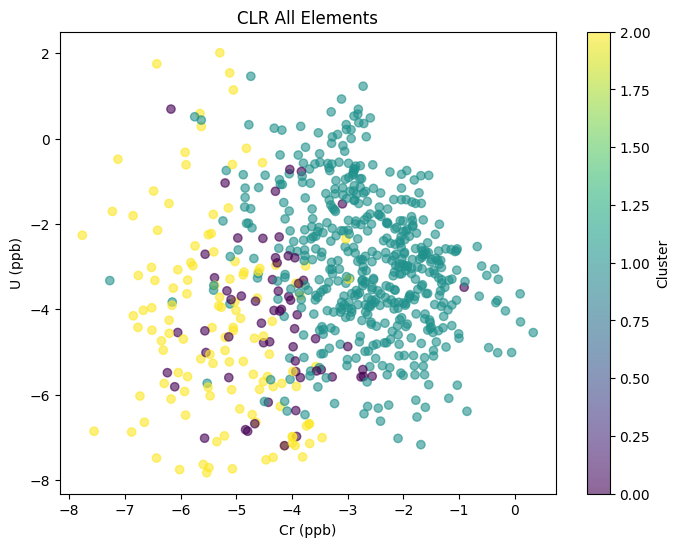

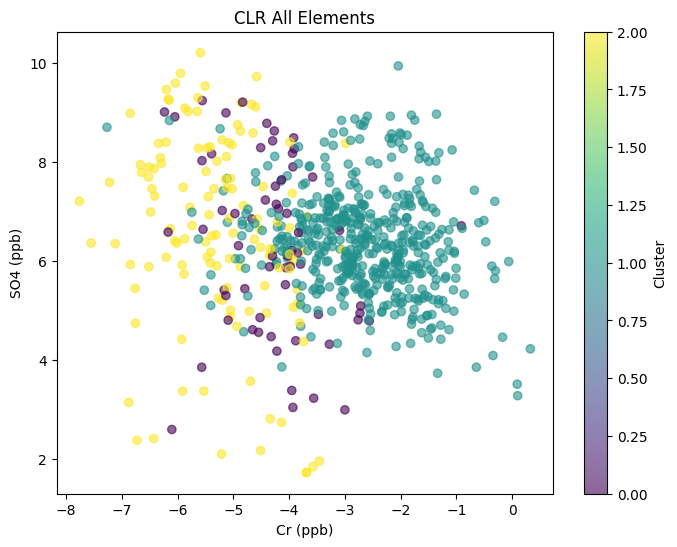

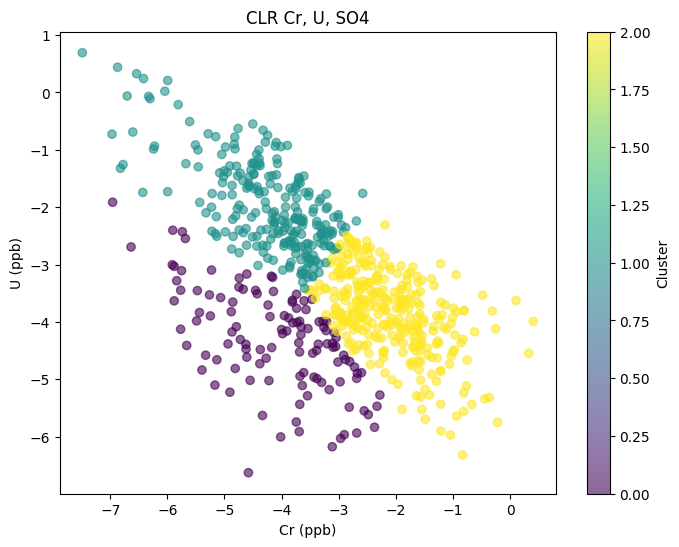

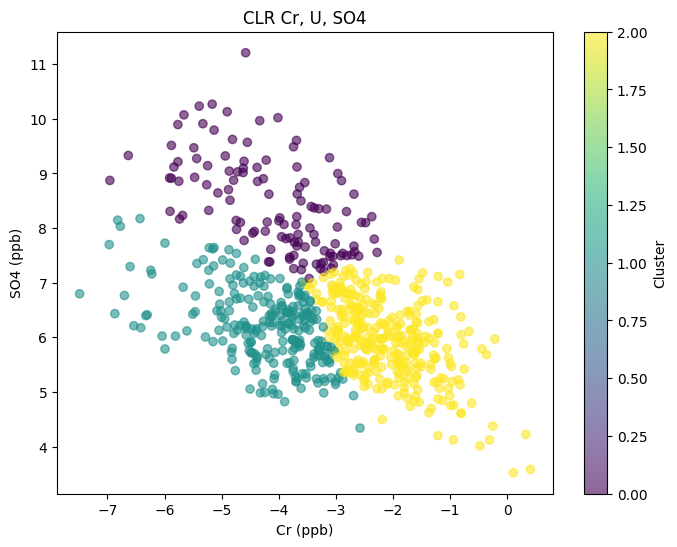

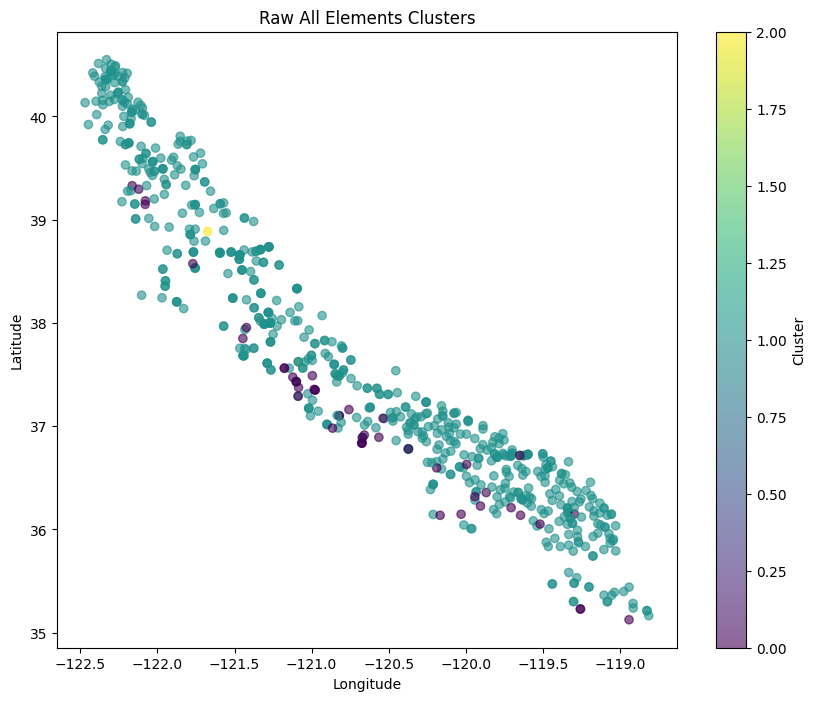

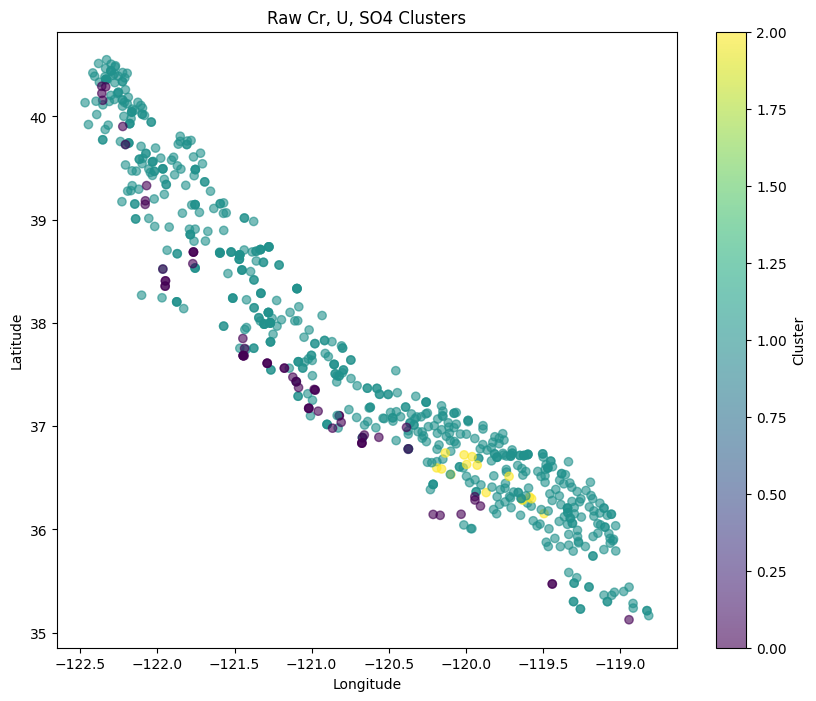

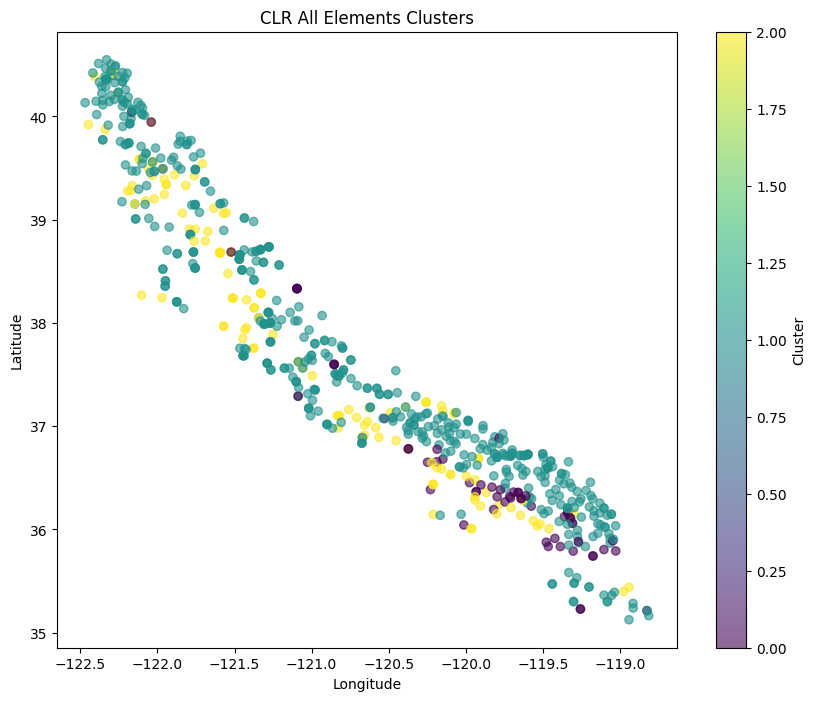

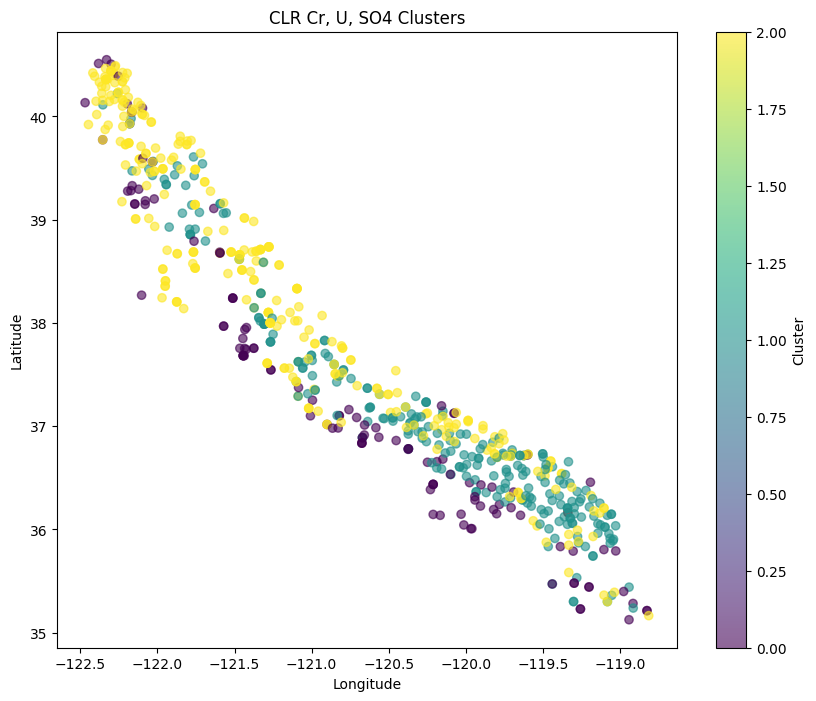

In [7]:
# Plot Cr vs. U and Cr vs. SO4 for all scenarios
scenarios = [
    (data, 'Cr (ppb)', 'U (ppb)', labels_raw_all, 'Raw All Elements'),
    (data, 'Cr (ppb)', 'SO4 (ppb)', labels_raw_all, 'Raw All Elements'),
    (data, 'Cr (ppb)', 'U (ppb)', labels_raw_subset, 'Raw Cr, U, SO4'),
    (data, 'Cr (ppb)', 'SO4 (ppb)', labels_raw_subset, 'Raw Cr, U, SO4'),
    (data_clr_all, 'Cr (ppb)', 'U (ppb)', labels_clr_all, 'CLR All Elements'),
    (data_clr_all, 'Cr (ppb)', 'SO4 (ppb)', labels_clr_all, 'CLR All Elements'),
    (data_clr_subset, 'Cr (ppb)', 'U (ppb)', labels_clr_subset, 'CLR Cr, U, SO4'),
    (data_clr_subset, 'Cr (ppb)', 'SO4 (ppb)', labels_clr_subset, 'CLR Cr, U, SO4')
]

for scenario in scenarios:
    plot_scatter(*scenario)

# Plot clusters on a map
def plot_map(data, labels, title):
    plt.figure(figsize=(10, 8))
    plt.scatter(data['Longitude'], data['Latitude'], c=labels, cmap='viridis', alpha=0.6)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(title)
    plt.colorbar(label='Cluster')
    plt.show()

plot_map(data, labels_raw_all, 'Raw All Elements Clusters')
plot_map(data, labels_raw_subset, 'Raw Cr, U, SO4 Clusters')
plot_map(data, labels_clr_all, 'CLR All Elements Clusters')
plot_map(data, labels_clr_subset, 'CLR Cr, U, SO4 Clusters')

In [8]:
# Select all element columns (columns with "(ppb)")
element_cols = [col for col in data.columns if '(ppb)' in col]
X_raw = data[element_cols]

In [9]:
# Standardize the data (critical for Euclidean distance in K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)
data['Cluster'] = labels  # Add cluster labels to the dataframe

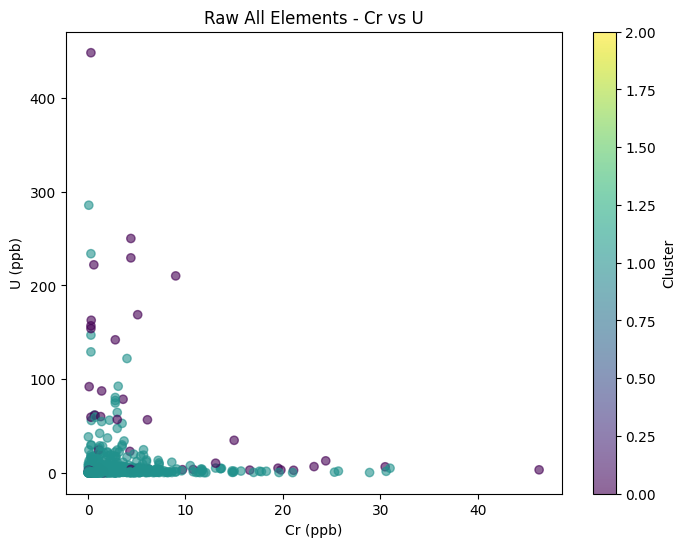

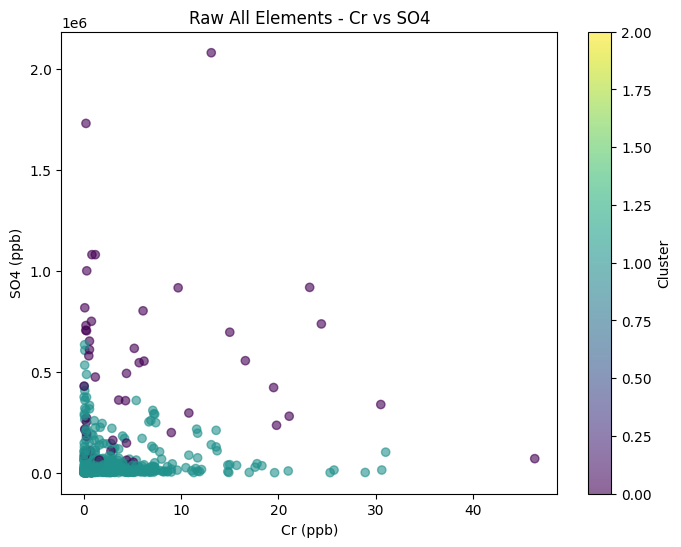

In [11]:
def plot_scatter(x_col, y_col, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[x_col], data[y_col], c=data['Cluster'], cmap='viridis', alpha=0.6)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title)
    plt.colorbar(label='Cluster')
    plt.show()

# Cr vs. U
plot_scatter('Cr (ppb)', 'U (ppb)', 'Raw All Elements - Cr vs U')

# Cr vs. SO4
plot_scatter('Cr (ppb)', 'SO4 (ppb)', 'Raw All Elements - Cr vs SO4')

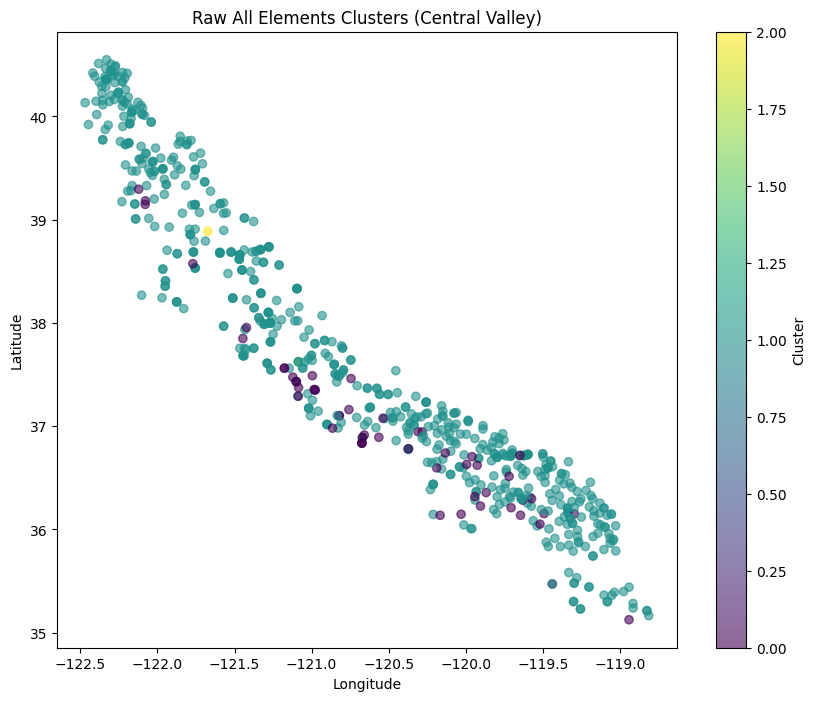

In [12]:
plt.figure(figsize=(10, 8))
plt.scatter(data['Longitude'], data['Latitude'], c=data['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Raw All Elements Clusters (Central Valley)')
plt.colorbar(label='Cluster')
plt.show()

In [13]:
# Select only Cr, U, and SO4 columns
subset_cols = ['Cr (ppb)', 'U (ppb)', 'SO4 (ppb)']
X_subset = data[subset_cols]

In [14]:
# Standardize the subsetted data
scaler = StandardScaler()
X_subset_scaled = scaler.fit_transform(X_subset)

In [15]:
kmeans_subset = KMeans(n_clusters=3, random_state=42)
subset_labels = kmeans_subset.fit_predict(X_subset_scaled)
data['Cluster_Subset'] = subset_labels  # Add subset cluster labels

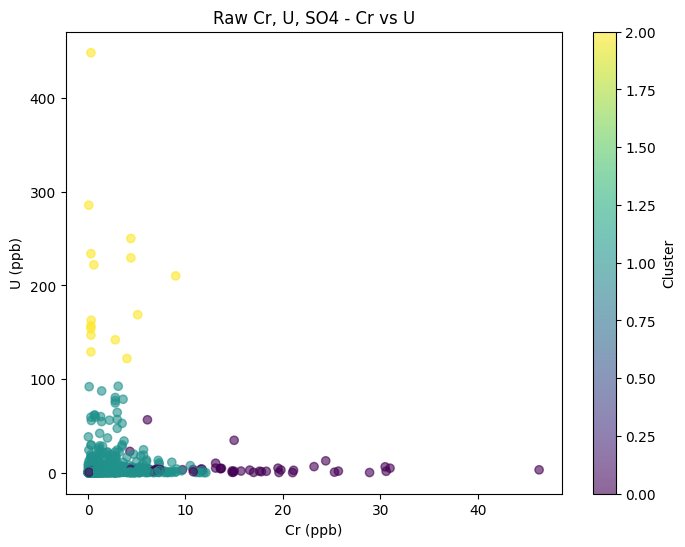

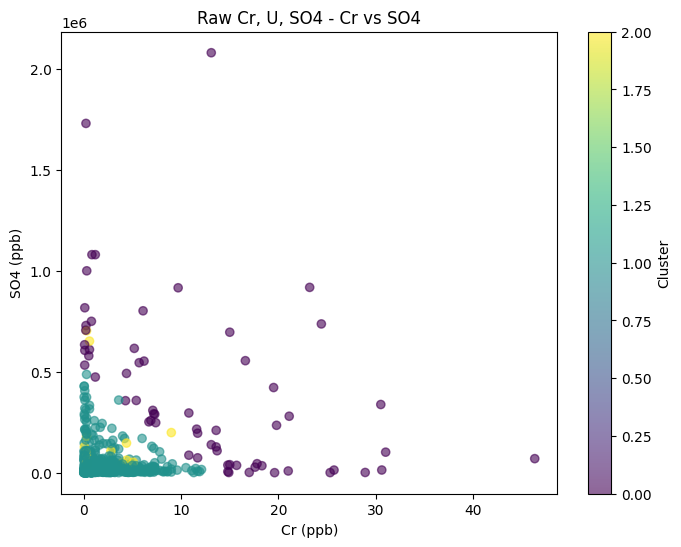

In [16]:
# Cr vs. U
plt.figure(figsize=(8, 6))
plt.scatter(data['Cr (ppb)'], data['U (ppb)'], c=data['Cluster_Subset'], cmap='viridis', alpha=0.6)
plt.xlabel('Cr (ppb)')
plt.ylabel('U (ppb)')
plt.title('Raw Cr, U, SO4 - Cr vs U')
plt.colorbar(label='Cluster')
plt.show()

# Cr vs. SO4
plt.figure(figsize=(8, 6))
plt.scatter(data['Cr (ppb)'], data['SO4 (ppb)'], c=data['Cluster_Subset'], cmap='viridis', alpha=0.6)
plt.xlabel('Cr (ppb)')
plt.ylabel('SO4 (ppb)')
plt.title('Raw Cr, U, SO4 - Cr vs SO4')
plt.colorbar(label='Cluster')
plt.show()

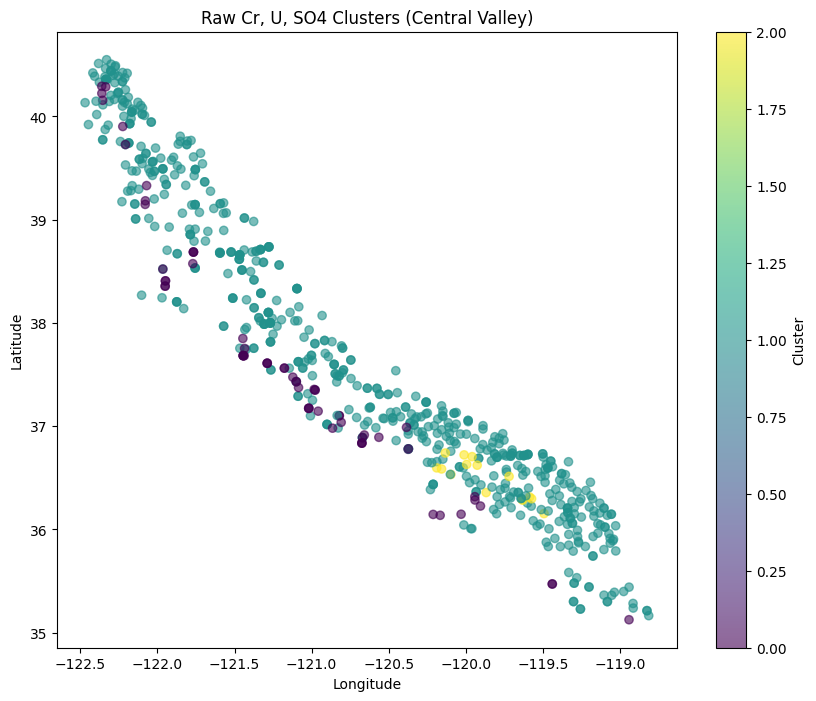

In [17]:
plt.figure(figsize=(10, 8))
plt.scatter(data['Longitude'], data['Latitude'], c=data['Cluster_Subset'], cmap='viridis', alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Raw Cr, U, SO4 Clusters (Central Valley)')
plt.colorbar(label='Cluster')
plt.show()

In [18]:
from scipy.stats import gmean

# Define all element columns (columns with "(ppb)")
element_cols = [col for col in data.columns if '(ppb)' in col]

# CLR transformation function
def clr_transform(df, cols):
    df_clr = df[cols] + 1e-9  # Add pseudocount to avoid zeros
    gm = gmean(df_clr, axis=1)  # Geometric mean for each row
    df_clr = np.log(df_clr.div(gm, axis=0))  # Divide by geometric mean and take log
    return df_clr

# Apply CLR to all elements
data_clr_all = clr_transform(data, element_cols)

In [19]:
# Standardize the CLR-transformed data (critical for K-means)
scaler = StandardScaler()
X_clr_scaled = scaler.fit_transform(data_clr_all)

In [20]:
kmeans_clr = KMeans(n_clusters=3, random_state=42)
clr_labels = kmeans_clr.fit_predict(X_clr_scaled)
data['Cluster_CLR_All'] = clr_labels  # Add cluster labels to the dataframe

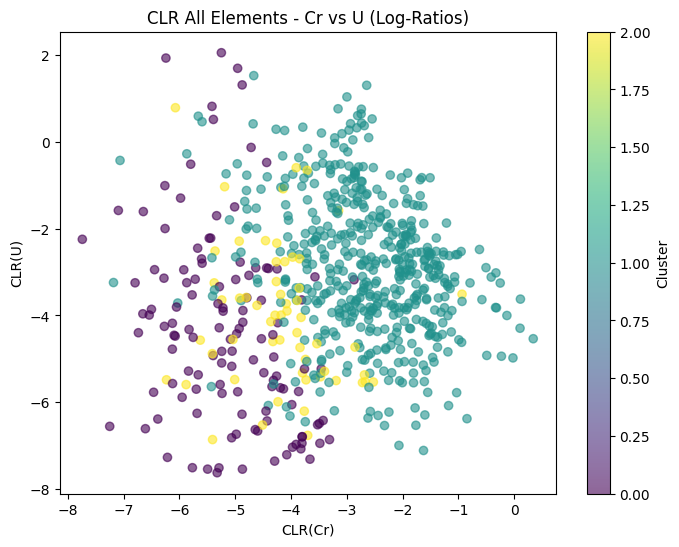

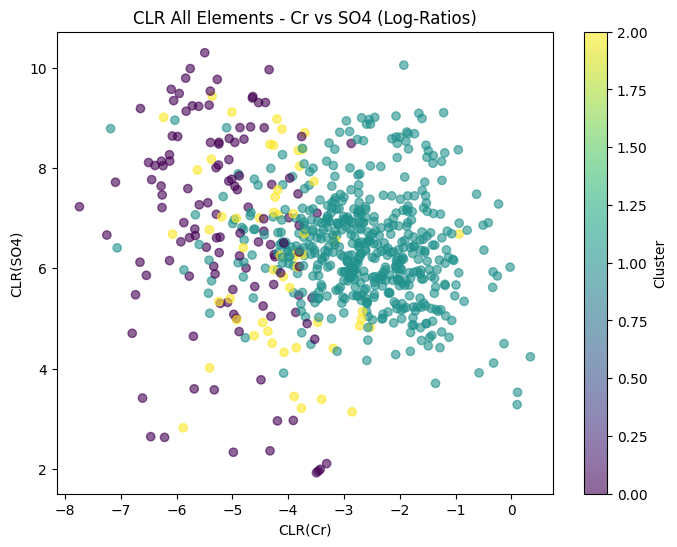

In [21]:
# Cr vs. U (CLR-transformed)
plt.figure(figsize=(8, 6))
plt.scatter(data_clr_all['Cr (ppb)'], data_clr_all['U (ppb)'], c=data['Cluster_CLR_All'], cmap='viridis', alpha=0.6)
plt.xlabel('CLR(Cr)')
plt.ylabel('CLR(U)')
plt.title('CLR All Elements - Cr vs U (Log-Ratios)')
plt.colorbar(label='Cluster')
plt.show()

# Cr vs. SO4 (CLR-transformed)
plt.figure(figsize=(8, 6))
plt.scatter(data_clr_all['Cr (ppb)'], data_clr_all['SO4 (ppb)'], c=data['Cluster_CLR_All'], cmap='viridis', alpha=0.6)
plt.xlabel('CLR(Cr)')
plt.ylabel('CLR(SO4)')
plt.title('CLR All Elements - Cr vs SO4 (Log-Ratios)')
plt.colorbar(label='Cluster')
plt.show()

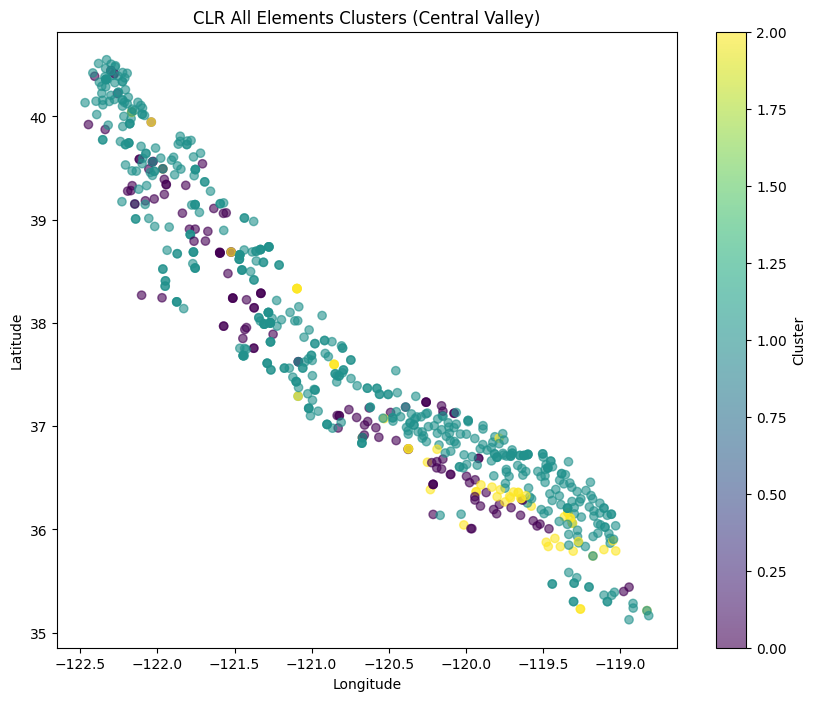

In [22]:
plt.figure(figsize=(10, 8))
plt.scatter(data['Longitude'], data['Latitude'], c=data['Cluster_CLR_All'], cmap='viridis', alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('CLR All Elements Clusters (Central Valley)')
plt.colorbar(label='Cluster')
plt.show()

In [23]:
# Select columns for Cr, U, and SO4 (exact column names from the dataset)
subset_cols = ['Cr (ppb)', 'U (ppb)', 'SO4 (ppb)']
X_subset = data[subset_cols]

In [24]:
from scipy.stats import gmean
import numpy as np

def clr_transform_subset(df):
    df_clr = df + 1e-9  # Add pseudocount to avoid zeros
    gm = df_clr.apply(gmean, axis=1)  # Geometric mean for each sample (row)
    df_clr = np.log(df_clr.div(gm, axis=0))  # CLR transformation
    return df_clr

data_clr_subset = clr_transform_subset(X_subset)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_clr_subset_scaled = scaler.fit_transform(data_clr_subset)

In [26]:
from sklearn.cluster import KMeans

kmeans_clr_subset = KMeans(n_clusters=3, random_state=42)
clr_subset_labels = kmeans_clr_subset.fit_predict(X_clr_subset_scaled)
data['Cluster_CLR_Subset'] = clr_subset_labels  # Add cluster labels

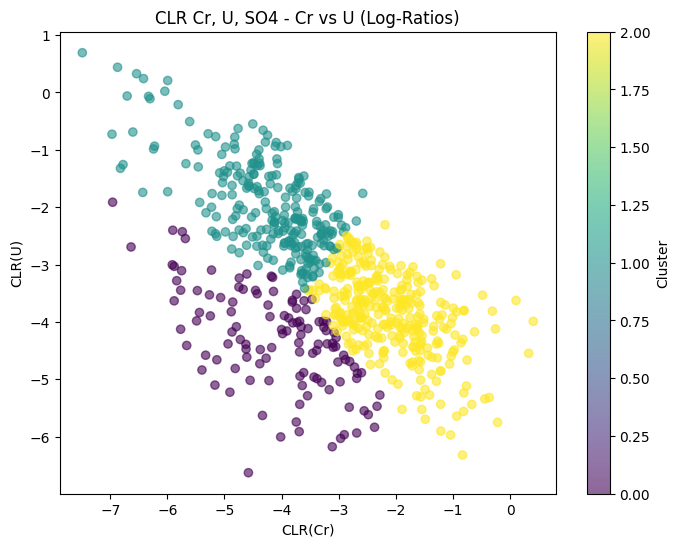

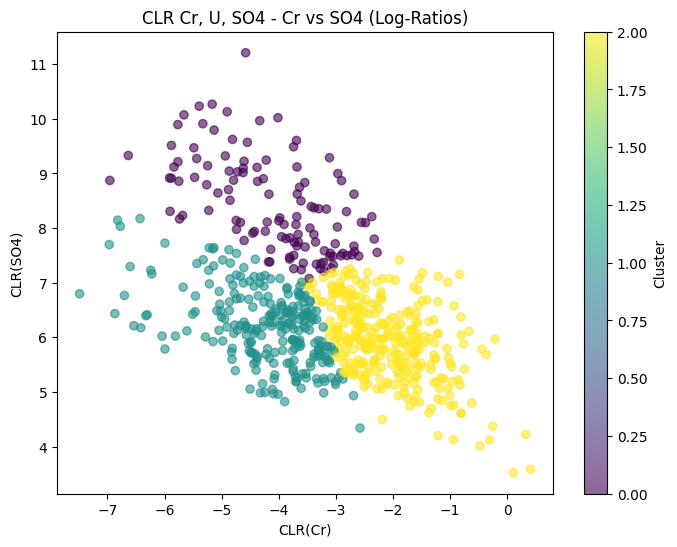

In [27]:
import matplotlib.pyplot as plt

# Cr vs. U (CLR-transformed)
plt.figure(figsize=(8, 6))
plt.scatter(data_clr_subset['Cr (ppb)'], data_clr_subset['U (ppb)'], 
            c=data['Cluster_CLR_Subset'], cmap='viridis', alpha=0.6)
plt.xlabel('CLR(Cr)')
plt.ylabel('CLR(U)')
plt.title('CLR Cr, U, SO4 - Cr vs U (Log-Ratios)')
plt.colorbar(label='Cluster')
plt.show()

# Cr vs. SO4 (CLR-transformed)
plt.figure(figsize=(8, 6))
plt.scatter(data_clr_subset['Cr (ppb)'], data_clr_subset['SO4 (ppb)'], 
            c=data['Cluster_CLR_Subset'], cmap='viridis', alpha=0.6)
plt.xlabel('CLR(Cr)')
plt.ylabel('CLR(SO4)')
plt.title('CLR Cr, U, SO4 - Cr vs SO4 (Log-Ratios)')
plt.colorbar(label='Cluster')
plt.show()

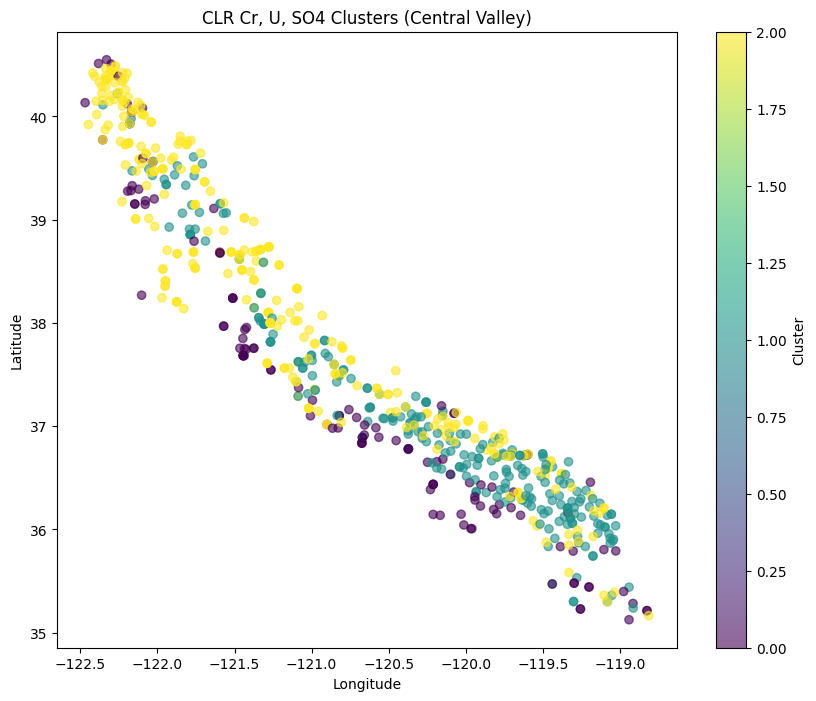

In [28]:
plt.figure(figsize=(10, 8))
plt.scatter(data['Longitude'], data['Latitude'], 
            c=data['Cluster_CLR_Subset'], cmap='viridis', alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('CLR Cr, U, SO4 Clusters (Central Valley)')
plt.colorbar(label='Cluster')
plt.show()